In [1]:
# Authors:amineRB

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#importing data
df = pd.read_csv('Absenteeism_at_work.csv', sep = ';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Lower outlier bound: -7.0
Upper outlier bound: 17.0


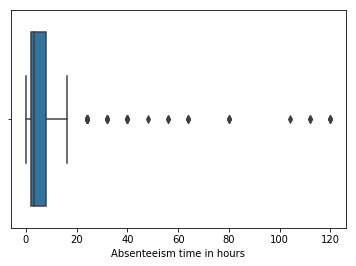

In [4]:
sns.boxplot(df['Absenteeism time in hours'])
median = np.median(df['Absenteeism time in hours'])
q75, q25 = np.percentile(df['Absenteeism time in hours'], [75 ,25])
iqr = q75 - q25
print("Lower outlier bound:",q25 - (1.5*iqr))
print("Upper outlier bound:",q75 + (1.5*iqr))
#dropping the following outliers above 17
df= df[df['Absenteeism time in hours']<=17]
df= df[df['Absenteeism time in hours']>=-7]

In [5]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
y=df['Absenteeism time in hours']
X=df.drop('Absenteeism time in hours',axis=1)#Extracting only the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("Number of unique ouput classes after preprocessing:",((np.unique(y_train))))

(696, 21)
(556, 20) (556,)
(140, 20) (140,)
Number of unique ouput classes after preprocessing: [ 0  1  2  3  4  5  7  8 16]


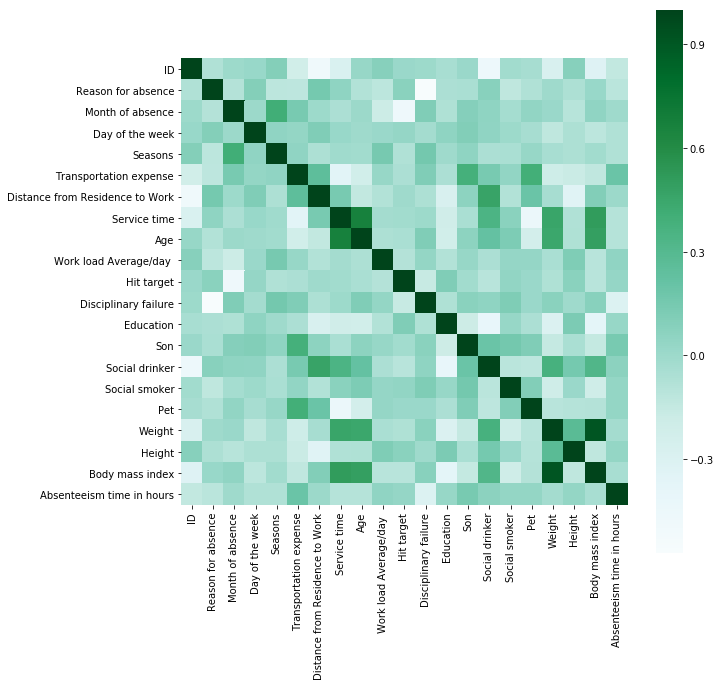

In [6]:
#Calculate the correlation of the above variables
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, square = True,cmap='BuGn') 

In [7]:
#Model 6 - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(max_iter=4000, alpha=0.1).fit(X_scaled_train,y_train)
y_pred = mlp.predict(X_scaled_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("------------------------\n")
print(classification_report(y_test, y_pred))

NameError: name 'X_scaled_train' is not defined